In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Série histórica do PIB do Brasil (valores em dólares, com ponto como milhar e vírgula como decimal)
pib_brasil_raw = [
    "1.802.212.206.814,50", "1.795.693.482.853,01", "2.063.514.977.365,65",
    "1.916.933.898.010,99", "1.873.288.205.059,69", "1.476.107.231.310,49",
    "1.670.647.398.904,90", "1.951.923.942.083,32", "2.191.131.765.684,63"
]

# Converter strings para float
pib_brasil = [float(valor.replace('.', '').replace(',', '.')) for valor in pib_brasil_raw]

# Criar DataFrame com anos
anos = pd.date_range(start="2015", periods=len(pib_brasil), freq="Y")
serie_pib = pd.Series(pib_brasil, index=anos)

/var/folders/hl/rckr42wd1rddnp7wmhpzbskw0000gn/T/ipykernel_2131/2168492474.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  anos = pd.date_range(start="2015", periods=len(pib_brasil), freq="Y")


/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


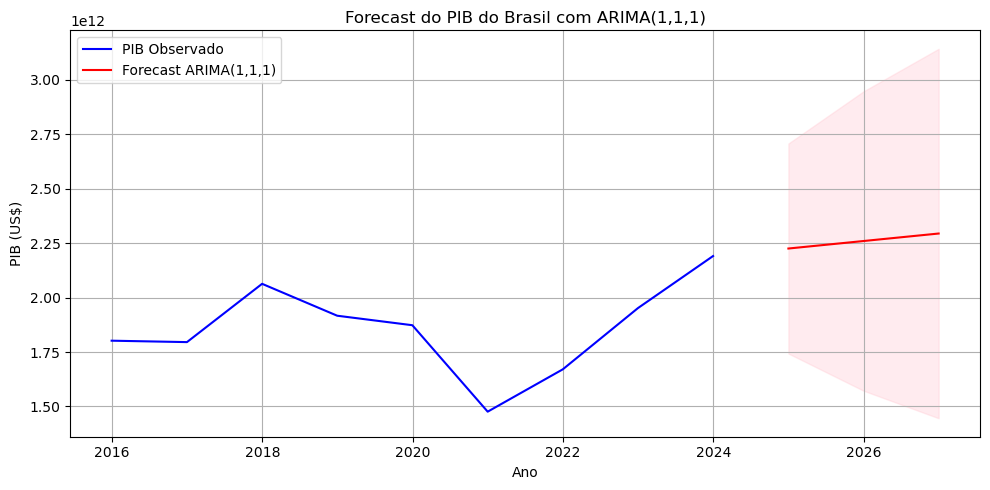

In [4]:
# Ajustar o modelo
modelo = ARIMA(serie_pib, order=(1, 1, 1))
modelo_fit = modelo.fit()

# Previsão para os próximos 3 anos
forecast = modelo_fit.get_forecast(steps=3)
media_prevista = forecast.predicted_mean
ic = forecast.conf_int()

# Plotar
plt.figure(figsize=(10, 5))
plt.plot(serie_pib, label="PIB Observado", color="blue")
plt.plot(media_prevista.index, media_prevista, label="Forecast ARIMA(1,1,1)", color="red")
plt.fill_between(media_prevista.index, ic.iloc[:, 0], ic.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Forecast do PIB do Brasil com ARIMA(1,1,1)")
plt.ylabel("PIB (US$)")
plt.xlabel("Ano")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()